In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [14]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; plotly()

Plots.PlotlyBackend()

In [15]:
include("../../src/NanoOpt.jl")

KsspSlab (generic function with 1 method)

In [40]:
λ₀ = 532
k₀ = 2π/λ₀

kₛₚₚ = k₀*sin((π/180)*80)
λₛₚₚ = 2π/kₛₚₚ

540.2069575232164

In [41]:
λbp(θ::Number,ϕ::Number) = λ₀/(sin((π/180)*80) + sin(θ)*cos(ϕ))
λbn(θ::Number,ϕ::Number) = λ₀/(sin((π/180)*80) - sin(θ)*cos(ϕ))

λbn (generic function with 1 method)

In [133]:
θA = 50:0.5:70
θAr= (π/180).*θA

ϕ = 0
ϕr = (π/180)*ϕ;

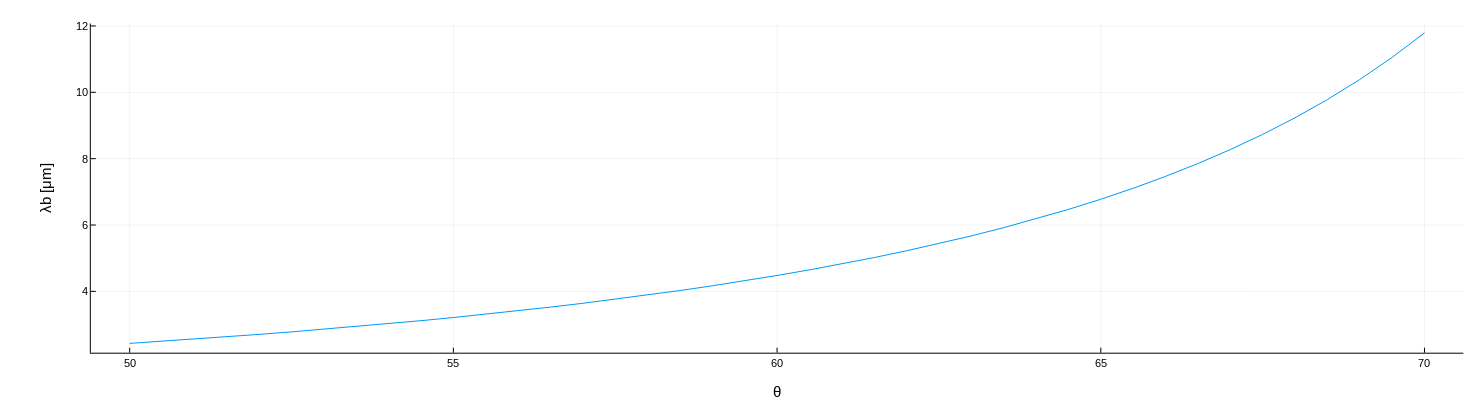

In [134]:
plot(θA ,λbn.(θAr,ϕr)./1000,label="",xlabel = "θ",ylabel="λb [μm]")

In [135]:
ϕA = -10:0.1:10

ϕAr = (π/180).*ϕA;


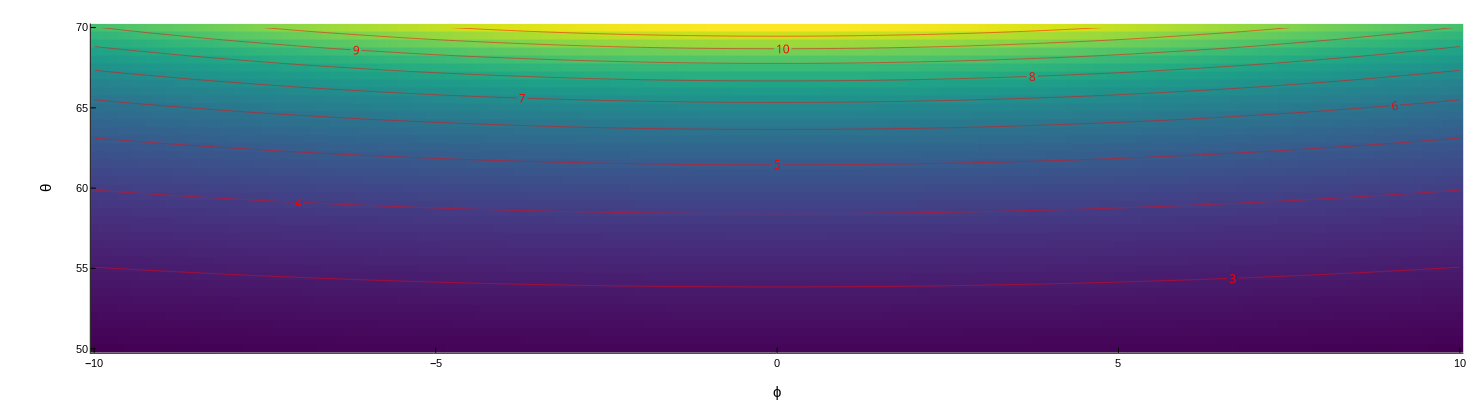

In [136]:
λArr = [λbn(θr,ϕr) for θr ∈ θAr, ϕr ∈ ϕAr]

heatmap(ϕA,θA,λArr./1000,cmap=:viridis)
contour!(ϕA,θA,λArr./1000,clabels=true, c=:red, lw=1.6,cbar=false,xlabel="ϕ",ylabel="θ")

In [118]:
nₛₛₚ = kₛₚₚ/k₀;

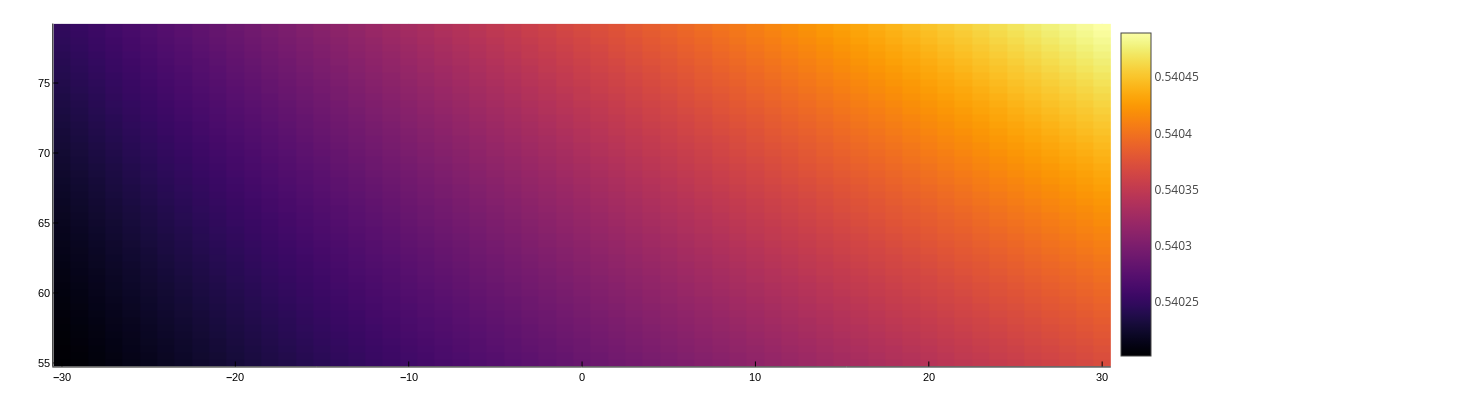

In [49]:
λArre = [Λedge(θr,ϕr,λ₀,nₛₛₚ) for θr ∈ θAr, ϕr ∈ ϕAr]

heatmap(ϕA,θA,λArre./1000)